In [4]:
import pandas as pd
from collections import Counter
from bs4 import BeautifulSoup
import requests
%matplotlib inline

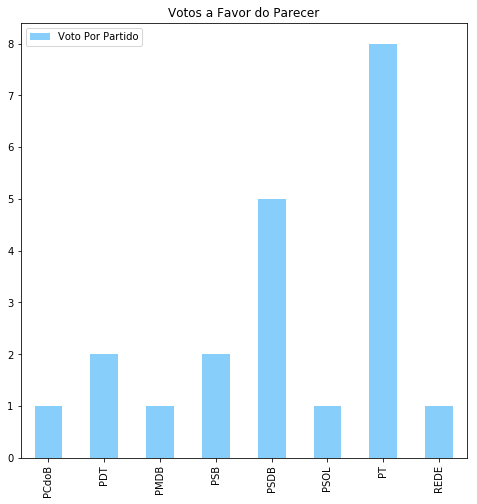

In [9]:
full_url = "http://infograficos.estadao.com.br/especiais/placar/votacao/politica/?id=Qj31LbS910"
page = requests.get(full_url)
soup = BeautifulSoup(page.content,"xml")

finalValue = []

data = soup.find_all("section", {"data-vote":"yes"})

for party in data:
    for partyName in party.find_all("span", {"class":"p-org"}):
        finalValue.append(partyName.text)

letter_counts = Counter(finalValue)
df = pd.DataFrame({'Voto Por Partido':letter_counts})
df.plot(kind="bar", 
                figsize=(8,8),
                color="lightskyblue",
                title="Votos a Favor do Parecer",
                stacked=True)
#df.plot.bar()